In [10]:
import numpy as np
import pandas as pd


In [11]:
df = pd.read_csv('/content/admission_data.csv')

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.shape

(500, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance             500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [23]:
df.duplicated().sum()

np.int64(0)

In [28]:
x = df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [29]:
x,y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 495        332          108                  5  4.5   4.0  9.02         1
 496        337          117                  5  5.0   5.0  9.87         1
 497        330          120                  5  4.5   5.0  9.56         1
 498        312          103                  4  4.0   5.0  8.43         0
 499        327          113                  4  4.5   4.5  9.04         0
 
 [500 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [36]:
from sklearn.preprocessing import MinMaxScaler # we scale with minmax becoz we know upper and lower bound in Gre score and Toepl score
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [37]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [39]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [61]:
model= Sequential()
model.add(Dense(10,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu',input_dim=7))

model.add(Dense(1,activation='linear'))# linear activation as output ,only in regression typr problem


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [64]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.0220 - val_loss: 1.0271
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8965 - val_loss: 0.9146
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8034 - val_loss: 0.8217
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7250 - val_loss: 0.7402
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6580 - val_loss: 0.6578
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5472 - val_loss: 0.5629
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4684 - val_loss: 0.4567
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3761 - val_loss: 0.3169
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2437 - val_loss: 0.1516
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1060 - val_loss: 0.0461
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0385 - val_loss: 0.0133
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [67]:
yp = model.predict(x_test_scaled)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [68]:
yp

array([[0.6362073 ],
       [0.6718499 ],
       [0.9932461 ],
       [0.7010193 ],
       [0.80894744],
       [0.6273589 ],
       [0.7217831 ],
       [0.70194346],
       [0.7705781 ],
       [0.6028191 ],
       [0.63569176],
       [0.51127505],
       [0.7631741 ],
       [0.8066157 ],
       [0.7535983 ],
       [0.85396576],
       [0.607023  ],
       [0.7503641 ],
       [0.9003103 ],
       [0.65302515],
       [0.590609  ],
       [0.7816335 ],
       [0.8382939 ],
       [0.56175035],
       [0.8139334 ],
       [0.5343831 ],
       [0.9603409 ],
       [0.6293112 ],
       [0.8540243 ],
       [0.6840875 ],
       [0.6233587 ],
       [0.80681413],
       [0.55438846],
       [0.90681005],
       [0.49422303],
       [0.80890125],
       [0.67584866],
       [0.6106449 ],
       [0.62430596],
       [0.91633224],
       [0.5216416 ],
       [0.6292511 ],
       [0.7497915 ],
       [0.98618114],
       [0.7535582 ],
       [0.4934408 ],
       [0.650887  ],
       [0.606

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,yp)

0.7973556795654954

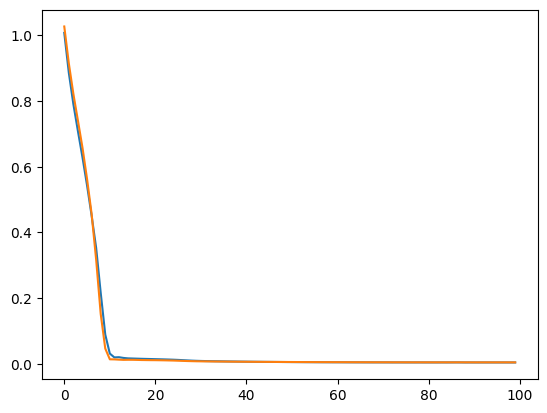

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])